In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
EXPORT_PLOTS = False
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

In [3]:
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,2,3,True,2010-06-15,D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work,32,0.088235
1,5,14,True,2010-01-07,chandra,believe me year try many many different hand c...,Best hand cream ever.,34,0.388889
2,5,0,True,2018-04-18,Maureen G,great hand lotion,Five Stars,1,0.000000
3,5,0,True,2018-04-18,Terry K,best severely dry skin hand,Five Stars,1,0.000000
4,5,0,True,2018-04-17,Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.,1,0.000000
...,...,...,...,...,...,...,...,...,...
591494,5,0,True,2013-02-22,Tiffany M.,come time described far work perfectly gamecub...,works on Gamecube,22,0.000000
591495,5,0,True,2013-02-22,Ian,get tire rebeat mario kart double dash wii get...,"cheap, does the job",22,0.000000
591496,5,14,True,2013-02-20,Alex Harker,product excellent ton gamecube game inexpensiv...,Inexpensive and Effective,22,0.583333
591497,5,0,True,2013-02-08,Cristina Hardwick,arrive way schedule work great need issue woul...,excellent,22,0.000000


In [4]:
five_star_reviews = df.loc[df.rating == 5]
one_star_reviews = df.loc[df.rating == 1]

In [5]:
len(five_star_reviews)

405465

In [6]:
len(one_star_reviews)

45026

In [7]:
one_star_words = one_star_reviews.assign(
    word=one_star_reviews["reviewText"].str.split()
).explode("word")["word"]
five_star_words = five_star_reviews.assign(
    word=five_star_reviews["reviewText"].str.split()
).explode("word")["word"]
one_star_words.head()

18        soooo
18        worth
18        money
18    packaging
18       aweful
Name: word, dtype: object

In [8]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (
    (five_star_words.value_counts()).head(1000).to_dict()
)

In [9]:
wc_one_star = WordCloud(
    width=1200, height=500, max_words=500
).generate_from_frequencies(counted_one_star)
wc_five_star = WordCloud(
    width=1200, height=500, max_words=500
).generate_from_frequencies(counted_five_star)
if EXPORT_PLOTS:
    wc_one_star.to_file("../../report/img/one_star_wordcloud.png")
    wc_five_star.to_file("../../report/img/five_star_wordcloud.png")

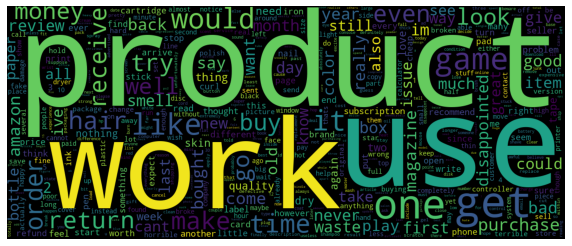

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star)
plt.axis("off")
plt.show()

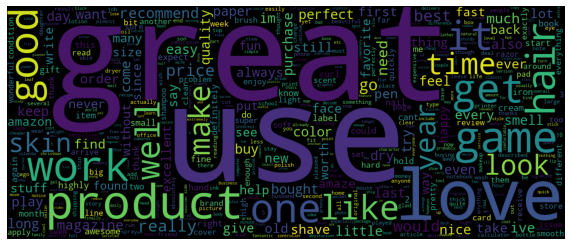

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star)
plt.axis("off")
plt.show()